In [88]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [73]:
df=pd.read_csv("DailyDelhiClimateTrain.csv")

In [74]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [76]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [77]:
df['date']=pd.to_datetime(df['date'])

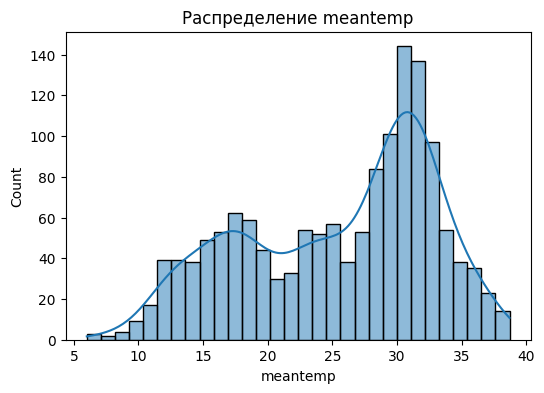

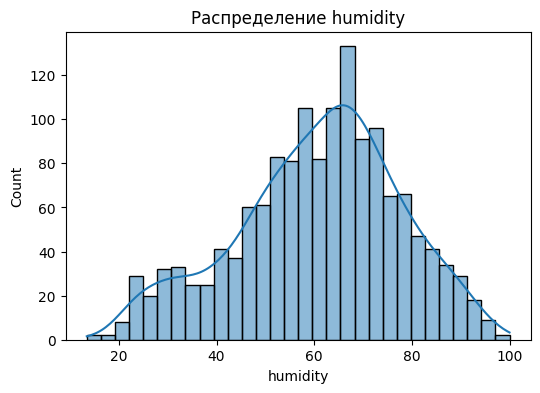

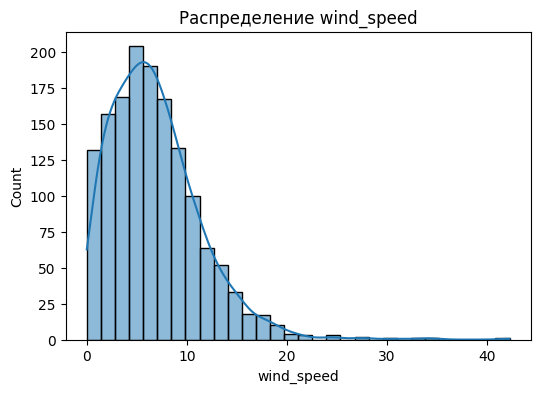

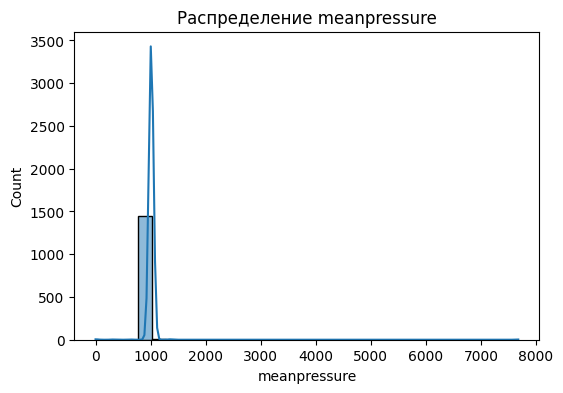

In [78]:
for col in df.columns[1:]:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Распределение {col}")
    plt.show()

In [79]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [80]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


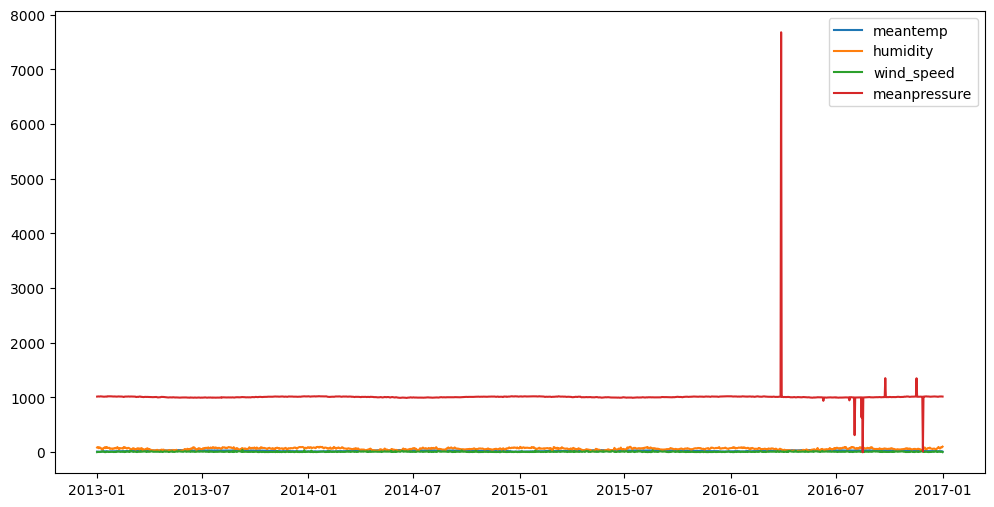

In [81]:
plt.figure(figsize=(12,6))
for col in df.columns[1:]:
    plt.plot(df["date"], df[col], label=col)
plt.legend()
plt.show()

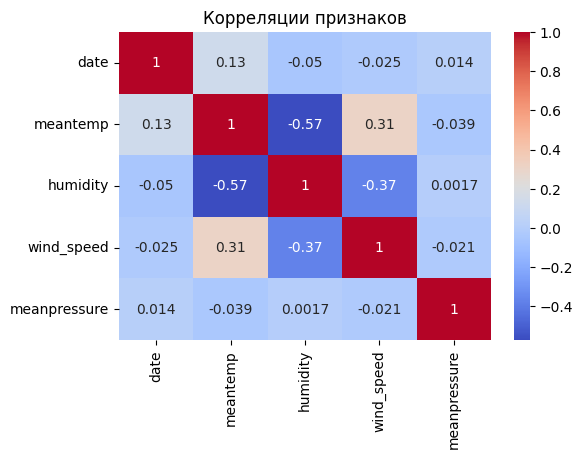

In [82]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Корреляции признаков")
plt.show()


In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
scaler = MinMaxScaler()

In [85]:
scaled_values = scaler.fit_transform(df[["meantemp", "humidity", "wind_speed", "meanpressure"]])
df_scaled = pd.DataFrame(scaled_values, columns=["meantemp", "humidity", "wind_speed", "meanpressure"])

In [86]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [89]:
def create_seq(data,window=7):
    X,y=[],[]
    for i in range(len(data)-window):
        seq = data[i:i+window_size].values
        target = data.iloc[i+window_size]["meantemp"]
        X.append(seq)
        y.append(target)
    return torch.tensor(X,dtype=torch.float32),torch.tensor(y,dtype=torch.float32)

In [91]:
window_size = 7
X, y = create_seq(df_scaled, window_size)


/var/folders/5x/7njwm149339_mfr2h0gypzl40000gn/T/ipykernel_3155/2967242764.py:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:256.)
  return torch.tensor(X,dtype=torch.float32),torch.tensor(y,dtype=torch.float32)


In [93]:
class LSTM(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers=2,dropout=0.3):
        super(LSTM,self).__init__()
        self.lstm=nn.LSTM(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,batch_first=True,
            dropout=dropout if num_layers > 1 else 0.0 )
        self.dropout=nn.Dropout(dropout)
        self.fc=nn.Linear(hidden_size,1)
    def forward(self,x):
        out, (h_n, c_n) = self.lstm(x)   
        out = h_n[-1]                     
        out = self.dropout(out)           
        out = self.fc(out)               
        return out

In [95]:
model=LSTM(input_size, hidden_size, num_layers, dropout)

In [96]:
model

LSTM(
  (lstm): LSTM(4, 64, num_layers=2, batch_first=True, dropout=0.3)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [98]:
train_size = int(0.8 * len(X))
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]
from torch.utils.data import TensorDataset, DataLoader

batch_size = 32

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [100]:
input_size = X_train.shape[2]  
hidden_size = 64
num_layers = 2
dropout = 0.3
criterion = nn.MSELoss()                  
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [101]:
epochs = 20

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)
    
    train_loss /= len(train_loader.dataset)
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            output = model(X_batch)
            loss = criterion(output.squeeze(), y_batch)
            val_loss += loss.item() * X_batch.size(0)
    val_loss /= len(val_loader.dataset)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

Epoch 1/20, Train Loss: 0.1151, Val Loss: 0.0698
Epoch 2/20, Train Loss: 0.0543, Val Loss: 0.0312
Epoch 3/20, Train Loss: 0.0362, Val Loss: 0.0108
Epoch 4/20, Train Loss: 0.0188, Val Loss: 0.0064
Epoch 5/20, Train Loss: 0.0133, Val Loss: 0.0086
Epoch 6/20, Train Loss: 0.0112, Val Loss: 0.0049
Epoch 7/20, Train Loss: 0.0099, Val Loss: 0.0052
Epoch 8/20, Train Loss: 0.0096, Val Loss: 0.0053
Epoch 9/20, Train Loss: 0.0086, Val Loss: 0.0057
Epoch 10/20, Train Loss: 0.0096, Val Loss: 0.0043
Epoch 11/20, Train Loss: 0.0101, Val Loss: 0.0052
Epoch 12/20, Train Loss: 0.0096, Val Loss: 0.0051
Epoch 13/20, Train Loss: 0.0098, Val Loss: 0.0043
Epoch 14/20, Train Loss: 0.0110, Val Loss: 0.0088
Epoch 15/20, Train Loss: 0.0123, Val Loss: 0.0177
Epoch 16/20, Train Loss: 0.0126, Val Loss: 0.0053
Epoch 17/20, Train Loss: 0.0079, Val Loss: 0.0043
Epoch 18/20, Train Loss: 0.0075, Val Loss: 0.0053
Epoch 19/20, Train Loss: 0.0083, Val Loss: 0.0069
Epoch 20/20, Train Loss: 0.0081, Val Loss: 0.0065


In [102]:
model.eval()
with torch.no_grad():
    y_pred = model(X_val).squeeze() 

In [108]:

y_pred_np = y_pred.numpy().reshape(-1,1)
y_val_np = y_val.numpy().reshape(-1,1)

y_pred_original = scaler.inverse_transform(
    np.concatenate([y_pred_np, np.zeros_like(y_pred_np), np.zeros_like(y_pred_np), np.zeros_like(y_pred_np)], axis=1)
)[:,0]

y_val_original = scaler.inverse_transform(
    np.concatenate([y_val_np, np.zeros_like(y_val_np), np.zeros_like(y_val_np), np.zeros_like(y_val_np)], axis=1)
)[:,0]


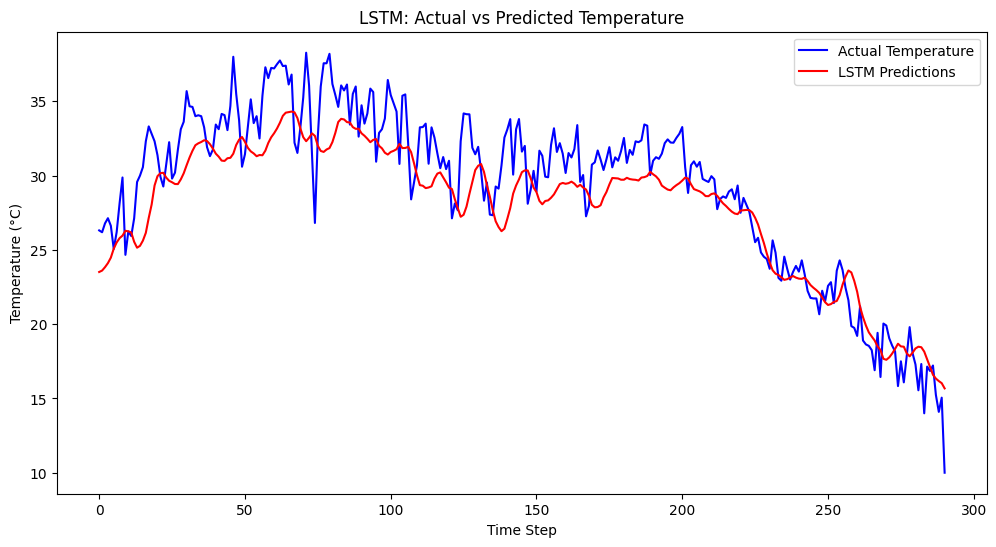

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_val_original, label="Actual Temperature", color="blue")
plt.plot(y_pred_original, label="LSTM Predictions", color="red")
plt.title("LSTM: Actual vs Predicted Temperature")
plt.xlabel("Time Step")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_val_original, y_pred_original))
mae = mean_absolute_error(y_val_original, y_pred_original)
r2 = r2_score(y_val_original, y_pred_original)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.3f}")


RMSE: 2.63
MAE: 2.12
R²: 0.784


In [112]:
import lightgbm as lgb

In [114]:
X_val_features = X_val[:,-1,:].numpy()  # последний день каждого окна
X_train_features = X_train[:,-1,:].numpy()

with torch.no_grad():
    y_train_pred = model(X_train).squeeze().numpy()
residuals_train = y_train.numpy() - y_train_pred

In [124]:
lgb_train = lgb.Dataset(X_train_features, label=residuals_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 35,
    'verbose': -1
}

gbm = lgb.train(params, lgb_train, num_boost_round=120)

In [125]:
residuals_pred = gbm.predict(X_val_features)

final_pred = y_pred_original + residuals_pred

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_val_original, final_pred))
mae = mean_absolute_error(y_val_original, final_pred)
r2 = r2_score(y_val_original, final_pred)

print(f"Ensemble RMSE: {rmse:.2f}")
print(f"Ensemble MAE: {mae:.2f}")
print(f"Ensemble R²: {r2:.3f}")

Ensemble RMSE: 2.60
Ensemble MAE: 2.09
Ensemble R²: 0.789
